In [46]:
#Im gonna build a machine learning model for doing laptop price prediction

In [47]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize']=(15,10)

In [48]:
#loading the dataset
df=pd.read_csv('C://Users/sojore/Documents/laptop price prediction/LaptopPricePrediction.csv')
df.head()

,Unnamed: 0,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating
0,0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹43,990",3.9
1,1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,"₹43,990",4.2
2,2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹31,490",4.6
3,3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹40,990",4.1
4,4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹27,490",4.1


In [49]:
#eploring the dataset
df.groupby('Name')['Name'].agg('count').sort_values(ascending=False)

Name
acer Predator Helios 300 Core i7 10th Gen - (16 GB/1 TB HDD/256 GB SSD/Windows 10 Home/6 GB Graphics/N...    24
MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 TB HDD/256 GB SSD/Windows 10 Home/6 GB Graphics/NVIDIA Ge...    23
Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB SSD/Windows 10 Home) IdeaPad 3 14ITL6 Thin and Light La...    22
Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1 TB HDD/Windows 10 Home) S145-15IIL Laptop                     22
Lenovo Ideapad 5 Ryzen 7 Octa Core 4700U - (8 GB/512 GB SSD/Windows 10 Home) 14ARE05 Thin and Light La...    15
                                                                                                             ..
HP Pavilion Core i5 11th Gen - (16 GB/512 GB SSD/Windows 10 Home/2 GB Graphics) 14-dv0084TX Thin and L...     1
HP Pavilion Core i5 8th Gen - (8 GB/1 TB HDD/128 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeForce G...     1
HP Pavilion Core i7 11th Gen - (16 GB/1 TB SSD/Windows 10 Home) 14-dv0058TU Thin and Light Laptop  

In [50]:
df.shape

(550, 10)

In [51]:
Processors=df.groupby('Processor')['Processor'].agg('count').sort_values(ascending=False)
len(Processors)

39

In [52]:
df.RAM.unique()

array(['8 GB DDR4 RAM', '4 GB DDR4 RAM', '16 GB DDR4 RAM',
       '8 GB LPDDR4X RAM', '8 GB LPDDR3 RAM', '32 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR3 RAM', '8 GB DDR3 RAM',
       '16 GB DDR3 RAM', '32 GB DDR4 RAM',
       'Upgradable SSD Upto 512 GB and RAM Upto 32 GB', '4 GB DDR3 RAM',
       '12 GB DDR4 RAM'], dtype=object)

In [53]:
#i will write a function to split these ram figures to only get the first numerical value e.g '8 GB DDR4 RAM' =8
def get_ram(x):
    res=x.split(' ')
    if len(res)>0:
        try:
            return int(res[0])
        except:
            return None
#testing the function
print(get_ram('re 8 GB DDR4 RAM'))

None


In [54]:
df.RAM=df.RAM.apply(get_ram)
df.sample(3)

,Unnamed: 0,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating
169,169,ASUS VivoBook Core i5 11th Gen - (16 GB/1 TB H...,Intel Core i3 Processor (10th Gen),16.0,64 bit Windows 10 Operating System,512 GB SSD,31.24 cm (12.3 inch) Touchscreen Display,1 Year International Travelers Warranty (ITW),"₹68,990",4.0
197,197,APPLE MacBook Pro with Touch Bar Core i5 10th ...,Intel Core i5 Processor (10th Gen),16.0,Mac OS Operating System,1 TB HDD|256 GB SSD,33.02 cm (13 inch) Display,1 Year Onsite Warranty Commencing from the Dat...,"₹1,69,990",4.8
217,217,MSI Prestige 14 Core i7 10th Gen - (16 GB/512 ...,AMD Ryzen 5 Hexa Core Processor,16.0,64 bit Windows 10 Operating System,1 TB HDD|128 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹99,990",3.9


In [55]:
df.RAM.unique()

array([ 8.,  4., 16., 32., nan, 12.])

In [56]:
df.groupby('Operating System')['Operating System'].agg('count')

Operating System
64 bit Chrome Operating System                                                                                               3
64 bit Windows 10 Operating System                                                                                         492
DOS Operating System                                                                                                         2
Mac OS Operating System                                                                                                     20
Pre-installed Genuine Windows 10 Operating System (Includes Built-in Security, Free Automated Updates, Latest Features)     11
Windows 10 Operating System                                                                                                 22
Name: Operating System, dtype: int64

In [57]:
df.Storage.unique()

array(['1 TB HDD', '256 GB SSD', '1 TB HDD|256 GB SSD', '512 GB SSD',
       '1 TB SSD', 'M.2 Slot for SSD Upgrade',
       '128 GB NVMe PCIe 3.0 x4 SSD', '1 TB HDD|128 GB SSD', '128 GB SSD',
       '512 GB SSD for Reduced Boot Up Time and in Game Loading',
       '1 TB HDD|512 GB SSD',
       '128 GB SSD for Reduced Boot Up Time and in Game Loading',
       '512 GB HDD|512 GB SSD'], dtype=object)

In [58]:
#i will write a function to return only the storage in GB e.g '1 TB HDD' to return 1000GB
def get_gb(x):
    res=x.split(' ')
    if len(res)>0:
        try:
            first_index_val=int(res[0])
            if first_index_val==1:
                return int(first_index_val*1000)
            else:
                return int(first_index_val)
        except:
            return None
#testing the function
get_gb('1 TB HDD')

1000

In [59]:
get_gb('128 GB NVMe PCIe 3.0 x4 SSD')

128

In [60]:
get_gb('re 128 GB NVMe PCIe 3.0 x4 SSD')
print(get_gb('te 128 GB NVMe PCIe 3.0 x4 SSD'))

None


In [61]:
df.Storage=df.Storage.apply(get_gb)
df.sample(5)

,Unnamed: 0,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating
178,178,ASUS Ryzen 7 Octa Core 5700U - (8 GB/512 GB SS...,AMD Ryzen 5 Dual Core Processor,8.0,64 bit Windows 10 Operating System,256.0,39.62 cm (15.6 inch) Display,"1 Year Limited Hardware Warranty, In Home Serv...","₹67,551",4.7
440,440,acer Aspire 5 Core i5 8th Gen - (8 GB + 16 GB ...,Intel Core i7 Processor (10th Gen),16.0,64 bit Windows 10 Operating System,1000.0,39.62 cm (15.6 inch) Display,2 Year Warranty,"₹61,990",3.3
449,449,DELL Inspiron Core i5 10th Gen - (8 GB/512 GB ...,Intel Core i3 Processor (11th Gen),4.0,64 bit Windows 10 Operating System,1000.0,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹67,590",3.0
140,140,ASUS vivobook Flip 14 Core i3 11th Gen - (8 GB...,Intel Core i5 Processor (10th Gen),8.0,64 bit Windows 10 Operating System,1000.0,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹49,990",5.0
420,420,acer P2 Series Core i5 10th Gen - (8 GB/1 TB H...,Intel Core i7 Processor (10th Gen),16.0,64 bit Windows 10 Operating System,1000.0,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹49,090",4.1


In [62]:
#i will write a function to convert these Display figures to only get the first numerical value e.g '35.56 cm (14 inch) Display'=35.56
def get_display(y):
    x=str(y)
    res=x.split(' ')
    if len(res)>0:
        try:
            return float(res[0])
        except:
            return None
#testing the function
print(get_display('35.56 cm (14 inch) Display'))

35.56


In [63]:
print(get_display('settin 35.56 cm (14 inch) Display'))

None


In [64]:
df.Display=df.Display.apply(get_display)
df.sample(4)

,Unnamed: 0,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating
370,370,ASUS ZenBook Flip 13 Core i5 11th Gen - (8 GB/...,Intel Core i7 Processor (8th Gen),8.0,64 bit Windows 10 Operating System,512.0,39.62,1 Year Onsite Warranty,"₹94,990",4.1
87,87,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i5 Processor (10th Gen),8.0,64 bit Windows 10 Operating System,512.0,33.78,1 Year Onsite Warranty,"₹43,990",4.4
390,390,acer Predator Helios 300 Core i5 7th Gen - (8 ...,Intel Core i5 Processor (11th Gen),NaN,64 bit Windows 10 Operating System,256.0,33.78,"1 Year Limited Hardware Warranty, In Home Serv...","₹1,29,999",1.0
486,486,ASUS Ryzen 5 Quad Core 3500U - (8 GB/512 GB SS...,Intel Core i5 Processor (8th Gen),16.0,64 bit Windows 10 Operating System,512.0,NaN,1 Year International Travelers Warranty (ITW),"₹47,590",4.2


In [65]:
df.Display.unique()

array([39.62, 35.56,   nan, 29.46, 33.78, 15.6 , 33.02, 34.04, 40.64,
       31.24, 38.1 , 34.54, 43.94, 34.29, 30.48, 25.65, 25.4 ])

In [66]:
#i will write a function to convert these Warranty figures to only get the first numerical value e.g '1 Year Onsite Warranty'=1
def get_warranty(y):
    x=str(y)
    res=x.split(' ')
    if len(res)>0:
        try:
            return int(res[0])
        except:
            return None
#testing the function
print(get_warranty('1 Year Onsite Warranty'))

1


In [67]:
df.Warranty=df.Warranty.apply(get_warranty)
df.head(4)

,Unnamed: 0,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating
0,0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8.0,64 bit Windows 10 Operating System,1000.0,39.62,1.0,"₹43,990",3.9
1,1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8.0,64 bit Windows 10 Operating System,256.0,35.56,1.0,"₹43,990",4.2
2,2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8.0,64 bit Windows 10 Operating System,256.0,35.56,1.0,"₹31,490",4.6
3,3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8.0,64 bit Windows 10 Operating System,256.0,35.56,1.0,"₹40,990",4.1


In [68]:
df.Price=df.Price.replace(['₹'],' ',regex=True)
df.head()

,Unnamed: 0,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating
0,0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8.0,64 bit Windows 10 Operating System,1000.0,39.62,1.0,"43,990",3.9
1,1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8.0,64 bit Windows 10 Operating System,256.0,35.56,1.0,"43,990",4.2
2,2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8.0,64 bit Windows 10 Operating System,256.0,35.56,1.0,"31,490",4.6
3,3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8.0,64 bit Windows 10 Operating System,256.0,35.56,1.0,"40,990",4.1
4,4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4.0,64 bit Windows 10 Operating System,1000.0,39.62,1.0,"27,490",4.1


In [69]:
def get_price(x):
    y=str(x)
    res=y.split(',')
    if len(res)>0:
        try:
            return float(res[0]+res[1])
        except:
            return None
t=get_price('43,990')
print(t)

43990.0


In [70]:
df.Price=df.Price.apply(get_price)
df.sample(5)

,Unnamed: 0,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating
333,333,DELL Inspiron Core i5 10th Gen - (8 GB/512 GB ...,Intel Core i5 Processor (10th Gen),8.0,64 bit Windows 10 Operating System,1000.0,39.62,1.0,76990.0,5.0
195,195,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (11th Gen),8.0,64 bit Windows 10 Operating System,1000.0,35.56,1.0,43990.0,4.2
61,61,MSI GF63 Thin Core i5 9th Gen - (8 GB/1 TB HDD...,Intel Core i5 Processor (11th Gen),8.0,64 bit Windows 10 Operating System,512.0,15.60,1.0,51990.0,4.0
267,267,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (11th Gen),8.0,Mac OS Operating System,512.0,39.62,2.0,43990.0,4.0
331,331,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,Intel Core i7 Processor (11th Gen),16.0,64 bit Windows 10 Operating System,512.0,39.62,3.0,109.0,5.0


In [71]:
df.Price.dtypes

dtype('float64')

In [72]:
df.isna().sum()

Unnamed: 0           0
Name                 0
Processor            0
RAM                  1
Operating System     0
Storage              1
Display             35
Warranty             2
Price                0
rating               0
dtype: int64

In [73]:
#im just drop all these nan values
df1=df.dropna()
df1.isnull().sum()

Unnamed: 0          0
Name                0
Processor           0
RAM                 0
Operating System    0
Storage             0
Display             0
Warranty            0
Price               0
rating              0
dtype: int64

In [74]:
df1.shape

(511, 10)

In [75]:
#handling outliers
df1['price_per_ram*storage']=df1['Price']/(df1['RAM']*df1['Storage'])
df1.sample(4)

<ipython-input-75-9bb892cb7c64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price_per_ram*storage']=df1['Price']/(df1['RAM']*df1['Storage'])


,Unnamed: 0,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating,price_per_ram*storage
215,215,Lenovo IdeaPad Ryzen 7 Octa Core 5700U - (16 G...,Intel Core i3 Processor (11th Gen),16.0,64 bit Windows 10 Operating System,512.0,33.02,1.0,67990.0,4.8,8.299561
40,40,ASUS Core i3 10th Gen - (4 GB/512 GB SSD/Windo...,Intel Core i5 Processor (11th Gen),4.0,64 bit Windows 10 Operating System,512.0,39.62,1.0,38990.0,3.4,19.038086
127,127,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,AMD Ryzen 7 Octa Core Processor,8.0,64 bit Windows 10 Operating System,512.0,35.56,1.0,43990.0,4.5,10.739746
530,530,acer NITRO 5 Ryzen 5 Hexa Core 5600H - (8 GB/1...,Intel Core i5 Processor (11th Gen),4.0,64 bit Windows 10 Operating System,1000.0,39.62,1.0,81900.0,1.0,20.475000


<function matplotlib.pyplot.show(close=None, block=None)>

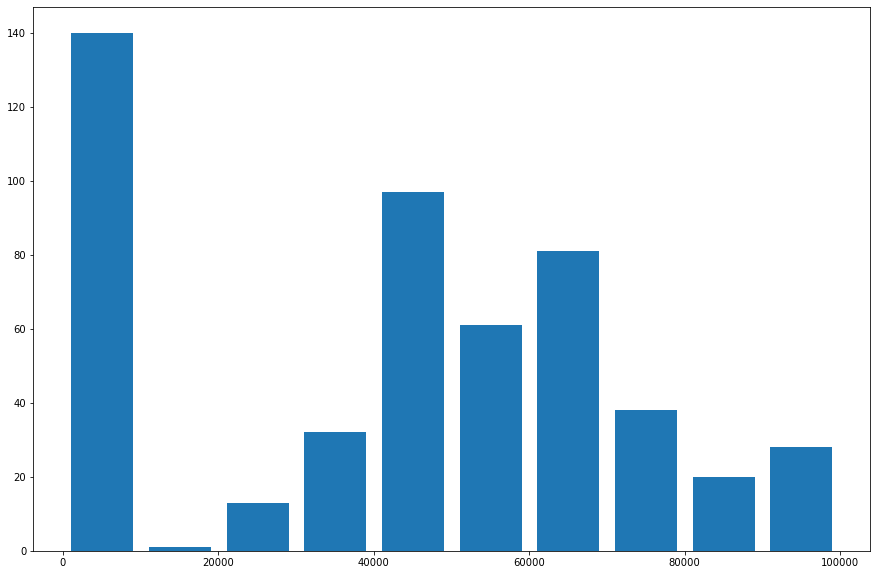

In [76]:
plt.hist(df1.Price,rwidth=0.8)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

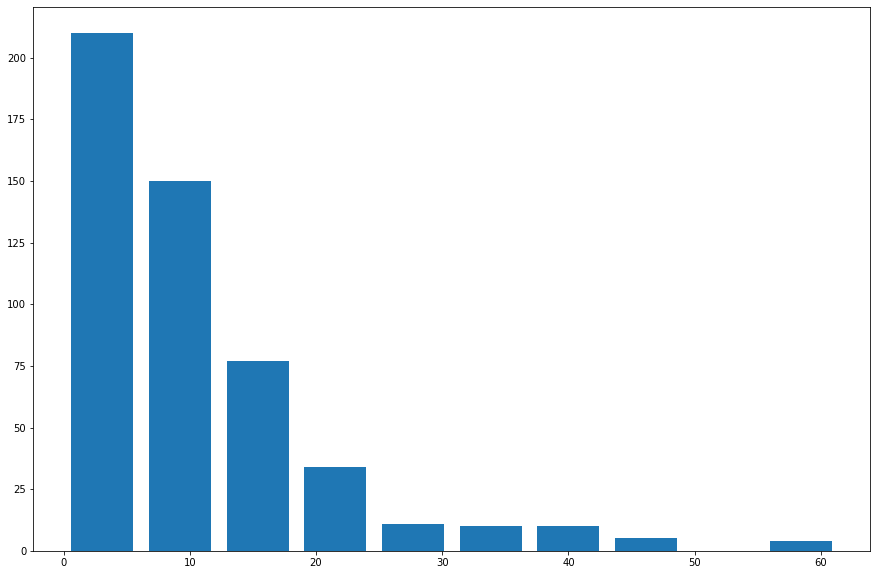

In [77]:
plt.hist(df1['price_per_ram*storage'],rwidth=0.8)
plt.show

In [78]:
df1.head(2)

,Unnamed: 0,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating,price_per_ram*storage
0,0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8.0,64 bit Windows 10 Operating System,1000.0,39.62,1.0,43990.0,3.9,5.498750
1,1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8.0,64 bit Windows 10 Operating System,256.0,35.56,1.0,43990.0,4.2,21.479492


In [79]:
ll1=df1['price_per_ram*storage'].quantile(0.01)
ul1=df1['price_per_ram*storage'].quantile(0.99)
df1[(df1['price_per_ram*storage']<=ll1) | (df1['price_per_ram*storage']>=ul1)]
df2=df1[(df1['price_per_ram*storage']>ll1) & (df1['price_per_ram*storage']<ul1)]
df2.shape

(492, 11)

In [80]:
ll2=df2.Price.quantile(0.1)
ul2=df2.Price.quantile(0.9)
df2[(df2.Price<=ll2) | (df2.Price>=ul2)]
df3=df2[(df2.Price>ll2) & (df2.Price<ul2)]
df3.shape

(371, 11)

In [81]:
ll3=df3.Display.quantile(0.01)
ul3=df3.Display.quantile(0.99)
df3[(df3.Display<=ll3) | (df3.Display>=ul3)]
df4=df3[(df3.Display>ll3) & (df3.Display<ul3)]
df4.shape

(367, 11)

In [82]:
ll4=df4.RAM.quantile(0.1)
ul4=df4.RAM.quantile(0.9)
df4[(df4.RAM<ll4) | (df4.RAM>ul4)]
df5=df4[(df4.RAM>=ll4) & (df4.RAM<=ul4)]
df5.shape

(362, 11)

In [83]:
df5.sample(4)

,Unnamed: 0,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating,price_per_ram*storage
57,57,MSI GF63 Thin Core i7 10th Gen - (8 GB/1 TB HD...,AMD Ryzen 7 Octa Core Processor,8.0,64 bit Windows 10 Operating System,1000.0,35.56,1.0,72990.0,4.0,9.123750
192,192,HP Core i3 11th Gen - (8 GB/256 GB SSD/Windows...,Intel Core i7 Processor (10th Gen),8.0,64 bit Windows 10 Operating System,1000.0,35.56,2.0,41980.0,4.3,5.247500
208,208,APPLE MacBook Pro with Touch Bar Core i5 10th ...,AMD Ryzen 7 Octa Core Processor,16.0,Mac OS Operating System,1000.0,39.62,1.0,174.0,4.2,0.010875
325,325,ASUS VivoBook 15 (2020) Core i5 10th Gen - (8 ...,Intel Core i7 Processor (11th Gen),8.0,64 bit Windows 10 Operating System,512.0,39.62,1.0,46990.0,4.5,11.472168


In [84]:
df5[df5.Price/(df5.Storage*df5.Display)<0.1]
df6=df5[~(df5.Price/(df5.Storage*df5.Display)<0.1)]
df6.shape

(306, 11)

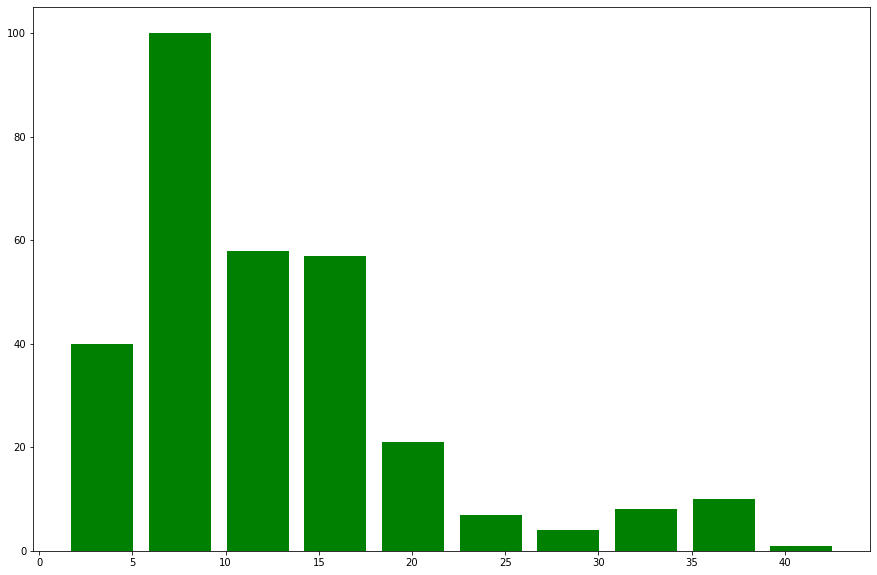

In [85]:
plt.hist(df6['price_per_ram*storage'],rwidth=0.8,color='g')
plt.show()

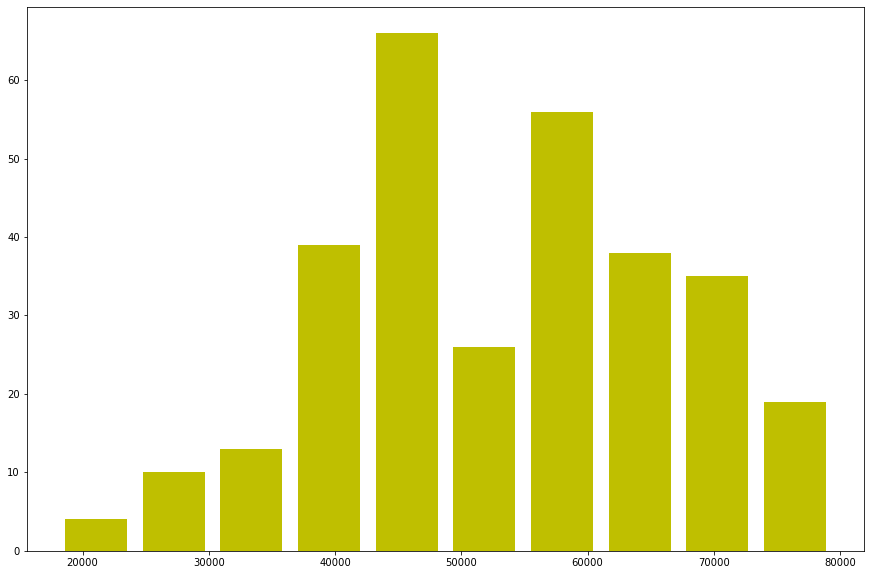

In [86]:
plt.hist(df6['Price'],rwidth=0.8,color='y')
plt.show()

In [87]:
#the above is kinda a normal distribution,which is pretty good
#next up is splitting the dataset for training and testing

In [88]:
df6.head(2)

,Unnamed: 0,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating,price_per_ram*storage
0,0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8.0,64 bit Windows 10 Operating System,1000.0,39.62,1.0,43990.0,3.9,5.498750
1,1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8.0,64 bit Windows 10 Operating System,256.0,35.56,1.0,43990.0,4.2,21.479492


In [89]:
#using labelencoder to get dummy values for the categoorical data columns
from sklearn.preprocessing import LabelEncoder
le_name=LabelEncoder()
le_processor=LabelEncoder()
le_operating_sys=LabelEncoder()
df6.Name=le_name.fit_transform(df6.Name)
df6.Processor=le_processor.fit_transform(df6.Processor)
df6['Operating System']=le_operating_sys.fit_transform(df6['Operating System'])
df6.head()

C:\Users\sojore\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-89-7fcd8d175884>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Operating System']=le_operating_sys.fit_transform(df6['Operating System'])


,Unnamed: 0,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating,price_per_ram*storage
0,0,175,17,8.0,1,1000.0,39.62,1.0,43990.0,3.9,5.498750
1,1,155,15,8.0,1,256.0,35.56,1.0,43990.0,4.2,21.479492
2,2,140,30,8.0,1,256.0,35.56,1.0,31490.0,4.6,15.375977
3,3,98,15,8.0,1,256.0,35.56,1.0,40990.0,4.1,20.014648
4,4,104,0,4.0,1,1000.0,39.62,1.0,27490.0,4.1,6.872500


In [93]:
#dropping unneccesary columns
df7=df6.drop(['Unnamed: 0','price_per_ram*storage','rating','Display','Operating System'],axis='columns')
df7.shape

(306, 6)

In [94]:
df7.sample(3)

,Name,Processor,RAM,Storage,Warranty,Price
479,170,23,16.0,512.0,1.0,60990.0
296,13,15,8.0,1000.0,1.0,64990.0
531,175,8,8.0,512.0,1.0,43990.0


In [95]:
X=df7.drop('Price',axis='columns')
X.shape

(306, 5)

In [96]:
y=df7.Price
y.head(4)

0    43990.0
1    43990.0
2    31490.0
3    40990.0
Name: Price, dtype: float64

In [97]:
df7.dtypes

Name           int32
Processor      int32
RAM          float64
Storage      float64
Warranty     float64
Price        float64
dtype: object

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [99]:
len(X_train)

244

In [100]:
X_test.shape

(62, 5)

In [101]:
##creating a machine learning model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [102]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
def find_best_model_using_gridsearchcv(X,y):
    models={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        'svm':{
            'model':SVC(),
            'params':{
                'C':[1,2,3],
                'kernel':['linear','rbf']
            }
        },
        'random_forest':{
            'model':RandomForestClassifier(),
            'params':{
                
            }
        },
        'logistic_regression':{
            'model':LogisticRegression(),
            'params':{}
        }
    }
#this is what we call hyper parameter tunning

    my_scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for model_name,config in models.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        my_scores.append({
            'model':model_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(my_scores,columns=['model','best_score','best_params'])


In [103]:
find_best_model_using_gridsearchcv(X_train,y_train)

C:\Users\sojore\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sojore\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

,model,best_score,best_params
0,linear_regression,-0.036711,{'normalize': True}
1,lasso,-0.036662,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,-0.054035,"{'criterion': 'mse', 'splitter': 'best'}"
3,svm,0.142857,"{'C': 1, 'kernel': 'linear'}"
4,random_forest,0.224490,{}
5,logistic_regression,0.106122,{}


In [105]:
#from the above i can choose the best algorithm to create my model
#i will simply employ svm for my model creation
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [106]:
#let me get the score of the model
model.score(X_test,y_test)

0.20967741935483872

In [107]:
#now i can use the model to do predictions
y_predicted=model.predict(X_test)
y_predicted[:5]

array([72989., 43990., 67922., 65990., 60970.])

In [108]:
y_test[:5]

260    75990.0
423    43990.0
298    53990.0
392    37990.0
388    46990.0
Name: Price, dtype: float64

In [ ]:
#next i will create a heatmap for a better visualization of the predicted results
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
cm=confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(20,10))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(159.0, 0.5, 'Truth')

In [ ]:
#my model is doing pretty good on doing the predictions
#next i can print a classification report
print('Classification Report: \n',classification_report(y_test,y_predicted))

In [ ]:
#the above model can be improved by applying more feature engineering tools to filter and handle outliers